# Spotify Prediction using Machine Learnings Algorithms 

### Suport Vector Machine, Randon Forest, K and Neural Network (Multi-layer Perceptron (MLP))

## Mauricio Carvajal

In this notebook the idea is go trhu the framework on those to do data science with python, and created a model that can predit if song from spotify will be liked or not.

Using the API from spotify -->https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/


For this the document is diviced in the following parts:

1- Cleaning and Preprocessing of the data
    
2- EDA (Exploratory Data Analysis)

3- Feature Engineering

4> Model Develoment and Evaluation

# Libraries

In [424]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import scipy
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from matplotlib import pylab
from pylab import *

#PreProcesing
from sklearn.preprocessing import StandardScaler, LabelEncoder

#Neural network
from sklearn.neural_network import MLPClassifier
#Clasification
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC



#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score

#Estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model


#cross validation
from sklearn.model_selection  import train_test_split
#It must relate to the renaming and deprecation of cross_validation sub-module to model_selection. 
#Try substituting cross_validation to model_selection

#PCA
from sklearn.decomposition import PCA

# OneHotEncoder
from sklearn.preprocessing import Imputer, OneHotEncoder

from sklearn.preprocessing import LabelEncoder

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# 1 Cleaning and Pre-processing

Thru the present course, the first step before start any Data Science project is to understand what is the problem statament, and if tha problem is agreed by the stakeholders.

After that step, is needed to do a cleaning of the data. Cleaning the data means that we are going to load, verify that there is not missing values, understand the data.

The second step, consist on the part of Pre process the data. This step is very important due to help us to improve the efficiency of the models will be develop.

Now  is share all the steps requiered to clean and pre-process the data.



## 1.1 Loading the data

In [493]:
#Import Data
spotifydataFrame = pd.read_csv('spotifyclassification/data.csv')
spotifydataFrameBackup = pd.read_csv('spotifyclassification/data.csv')

## 1.2 Cleaning

In [426]:
# First step is to review take quick look of the data
spotifydataFrame.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [427]:
#to check the data types of each variable 
spotifydataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
Unnamed: 0          2017 non-null int64
acousticness        2017 non-null float64
danceability        2017 non-null float64
duration_ms         2017 non-null int64
energy              2017 non-null float64
instrumentalness    2017 non-null float64
key                 2017 non-null int64
liveness            2017 non-null float64
loudness            2017 non-null float64
mode                2017 non-null int64
speechiness         2017 non-null float64
tempo               2017 non-null float64
time_signature      2017 non-null float64
valence             2017 non-null float64
target              2017 non-null int64
song_title          2017 non-null object
artist              2017 non-null object
dtypes: float64(10), int64(5), object(2)
memory usage: 268.0+ KB


In [428]:
#the total number of missing values in the DataFrame
print("The number of missing values in the data frame is: "+ str(spotifydataFrame.isnull().values.sum()))

#credict.dropna()

The number of missing values in the data frame is: 0


Very important step is to verify that there is not missing values on the data set, due to this will case a lot of issues when the models are performing. In the  present project, the data set doesn't require any addional steps regarding this topic, due to  the summary of the missing values is 0.

## 1.3 Pre-Procesing

Preprocessing the information, as described below, is a critical step to have a good model to predict. Due to this help in the performance of the models, due to a transformation to more significant information.

Also, preprocessing helps to get familiar with the data, and make the necessary changes to the data can be representative of the model.

The data here is transformed, encoded, understood for been easily past for the different models that will be built it.


### 1.3.1 Feature Understanding

In this section, we understand the different features of the data set,


Part of the selection of this data set is due to I really love the music and seems very interesting as a personal project in the future to create a classifier or clustering with my own database. I used a lot of Spotify so will be very interesting to see the results.

From the other side, all the feature are presented in the Spotify API-->https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

duration_ms	int	The duration of the track in milliseconds.

duration_mst-->	The duration of the track in milliseconds.

key--> The estimated overall key of the track. 

mode--> Mode indicates the modality (major or minor) of a track

time_signature--> An estimated overall time signature of a track. 

acousticness--> A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 

danceability--> Describes how suitable a track is for dancing based on a combination.

energy--> Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. 

instrumentalness--> Predicts whether a track contains no vocals. 

liveness--> Detects the presence of an audience in the recording.

speechiness--> Speechiness detects the presence of spoken words in a track. 

tempo--> The overall estimated tempo of a track in beats per minute (BPM)





### 1.3.2 Transforming the data

Base on the previos section, and after load the data, it's needed to transform to the value that is needed.

In [429]:
# Removing the ID from the dataset
spotifydataFrame = spotifydataFrame.drop(columns = ['song_title'])

In [430]:
spotifydataFrame = spotifydataFrame.drop(spotifydataFrame.columns[0], axis=1)

In [431]:
# Converting  to object
spotifydataFrame['key']=spotifydataFrame['key'].astype('object')

In [432]:
# 	Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0
spotifydataFrame['mode']=spotifydataFrame['mode'].astype('object')

The ID doesn't provide any relevant information for the analsys

In [433]:
spotifydataFrame.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Junior Boys


### 1.3.3 Binning the data

Binning the data is the porcess in which the  data is transform to reduce the effects of minor observation errors. The original data values which fall into a given small interval, a bin, are replaced by a value representative of that interval, often the central value. It is a form of quantization.

In [434]:
spotifydataFrame['duration_ms'].describe()

count    2.017000e+03
mean     2.463062e+05
std      8.198181e+04
min      1.604200e+04
25%      2.000150e+05
50%      2.292610e+05
75%      2.703330e+05
max      1.004627e+06
Name: duration_ms, dtype: float64

In [435]:
spotifydataFrame['duration_ms']=pd.qcut(spotifydataFrame['duration_ms'], q=4)

The duration is choosend due to their intrisict caracteristics, so for our analysis is divided in 4

# 2 EDA

EDA, or Exploratory data analsys is a critical step in data science, due to this describe a high level how is the data, what are the relevant features, if the data is enough, and a lot of eleement that provide a overview.

So this step is needed previos to build a machine learning model, some of the activities that involves EDA are:


Visualization and Statistics about each variable

Scatter plots comparing the relationships between any two variables


In [504]:
credit = pd.read_csv('Data/default_of_creditcardclients.csv', header =1)

In [505]:
#converting Data from int to chategorical value
#(1 = male; 2 = female)
credit['SEX']=credit['SEX'].astype('object')

#(1 = graduate school; 2 = university; 3 = high school; 0, 4, 5, 6 = others)
credit['EDUCATION']=credit['EDUCATION'].astype('object')

# (1 = married; 2 = single; 3 = divorce; 0=others)
credit['MARRIAGE']=credit['MARRIAGE'].astype('object')

#X6 - X11: History of past payment. We tracked the past monthly payment records (from
#April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7
#= the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005.
#The measurement scale for the repayment status is:
#-2: No consumption; -1: Paid in full; 0: The use of revolving credit; 1 = payment delay
#for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight
#months; 9 = payment delay for nine months and above.
credit['PAY_0']=credit['PAY_0'].astype('object')
credit['PAY_2']=credit['PAY_2'].astype('object')
credit['PAY_3']=credit['PAY_3'].astype('object')
credit['PAY_4']=credit['PAY_4'].astype('object')
credit['PAY_5']=credit['PAY_5'].astype('object')
credit['PAY_6']=credit['PAY_6'].astype('object')

#client's behavior; Y=0 then not default, Y=1 then default
#credit['default payment next month']=credit['default payment next month'].astype('object')

In [506]:
#Saved
credit.to_csv(r'Data/default_of_creditcardclientsPreproced.csv', index = False)

In [511]:
def age_distribution(passenger):
    AGE, SEX = passenger
    
    if  AGE < 14:
        return 'Very Low'
    elif  AGE < 24:
        return 'Low'
    if  AGE < 34:
        return 'Medium'
    if  AGE < 64:
        return 'High'
    else:
        return "Very High"

In [512]:
credit['person'] = credit[['AGE', 'SEX']].apply(age_distribution, axis=1)

In this graphic, we can see that the data is balanced, which means that when we are going to build the models there is no a tendency or bias to if the song is liked or not.

There are equal numbers of songs that are like and not. In summary, the data set is balance regarding our dependent variable.

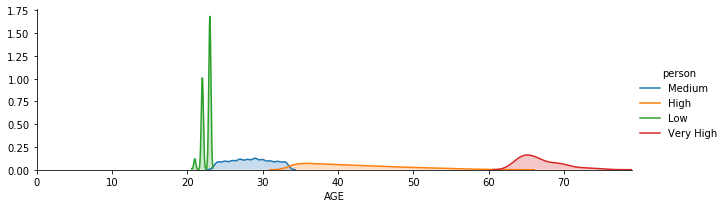

In [513]:
fig = sns.FacetGrid(credit, hue='person', aspect=3)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = credit['AGE'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

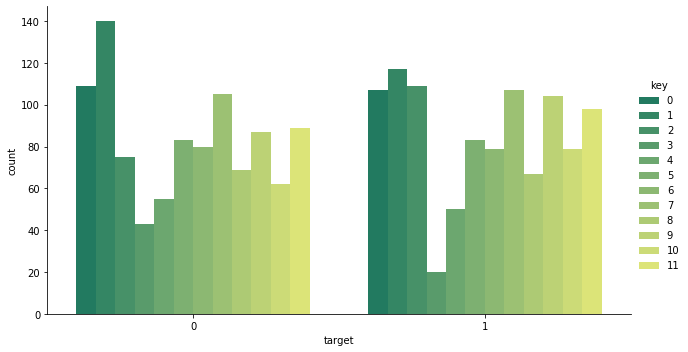

In [437]:
g = sns.catplot('target', data=spotifydataFrame, hue='key', kind='count', aspect=1.75, palette='summer')
g.set_xlabels('target')

In this graphic we saw how is represent the key feature agains the dependent variable, and the concusion is that it' have a similar behavior in wich there are some keys that are not too popular.

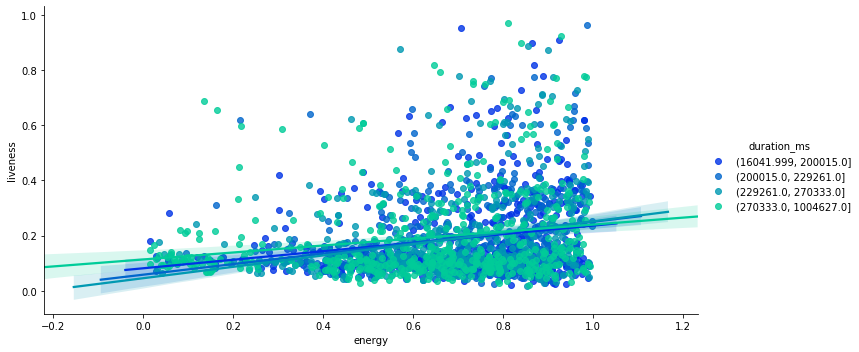

In [438]:
sns.lmplot('energy', 'liveness', data=spotifydataFrame, hue='duration_ms',palette='winter', aspect=2)#, hue_order=range(1,4))

In this plot is represented the energy and liveness of the songs agains the duration of each, and it's sound that there are tendency of liniar relationship.

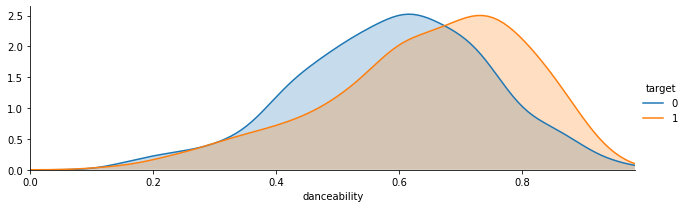

In [439]:
fig = sns.FacetGrid(spotifydataFrame, hue='target', aspect=3)
fig.map(sns.kdeplot, 'danceability', shade=True)
oldest = spotifydataFrame['danceability'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

Another important feature to analyze is the danceability of the song, and how is the impact between the final decision if the song is good or not. And according to with the plot above, it's clear that if this characteristic is more elevated it has more possibility to be liked the song.

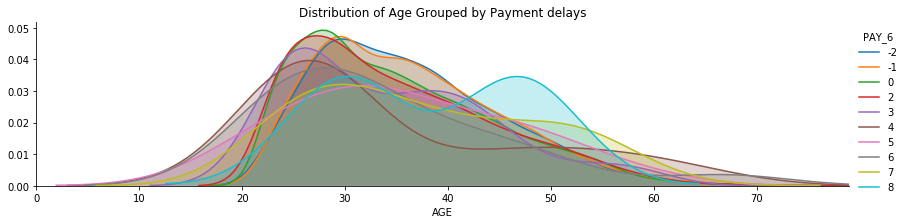

In [514]:
fig = sns.FacetGrid(credit, hue='PAY_6', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = credit['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Payment delays')
fig.add_legend()

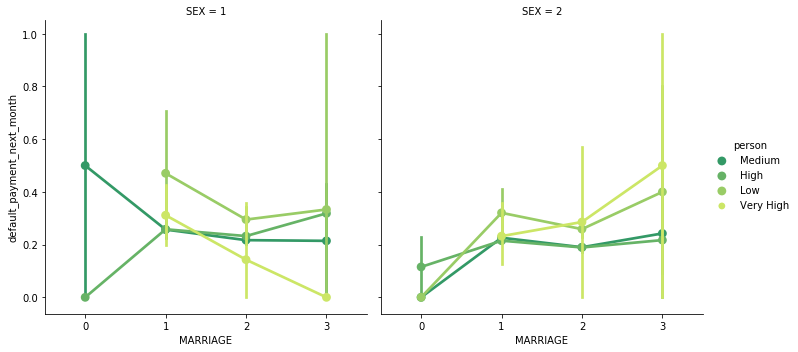

In [533]:
sns.factorplot('MARRIAGE', 'default_payment_next_month', palette='summer', data=credit, hue='person',col='SEX')

# 4 Feature Engineering 

In feature engineering, it can be defined as the process to improve the features that will be used for the machine learning algorithms or data mining algorithms. This process will take the database, analyzed, split it, pre-process, transformed and then presented to be ready to used to build the algorithms.

Some commons usages of feature engineering are: PCA, dimensional reductions,ect.

## 4.1 Feature Selection

In [440]:
spotifydataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 15 columns):
acousticness        2017 non-null float64
danceability        2017 non-null float64
duration_ms         2017 non-null category
energy              2017 non-null float64
instrumentalness    2017 non-null float64
key                 2017 non-null object
liveness            2017 non-null float64
loudness            2017 non-null float64
mode                2017 non-null object
speechiness         2017 non-null float64
tempo               2017 non-null float64
time_signature      2017 non-null float64
valence             2017 non-null float64
target              2017 non-null int64
artist              2017 non-null object
dtypes: category(1), float64(10), int64(1), object(3)
memory usage: 222.9+ KB


### 4.1.1 All features

In [441]:
#features
spotifydataFrameFeatures = spotifydataFrame.drop(columns = ['target'])
spotifydataFrameFeatures.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,artist
0,0.0102,0.833,"(200015.0, 229261.0]",0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,Future
1,0.1990,0.743,"(270333.0, 1004627.0]",0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,Childish Gambino
2,0.0344,0.838,"(16041.999, 200015.0]",0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,Future
3,0.6040,0.494,"(16041.999, 200015.0]",0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,Beach House
4,0.1800,0.678,"(270333.0, 1004627.0]",0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,Junior Boys


### 4.1.2 Numerical Features

In [442]:
#features
spotifydataFrameFeaturesNum = spotifydataFrameFeatures.drop(columns = ['duration_ms','key','mode','artist'])
print('Selecting the amout of bill statment')
spotifydataFrameFeaturesNum.head()

Selecting the amout of bill statment


,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence
0,0.0102,0.833,0.434,0.021900,0.1650,-8.795,0.4310,150.062,4.0,0.286
1,0.1990,0.743,0.359,0.006110,0.1370,-10.401,0.0794,160.083,4.0,0.588
2,0.0344,0.838,0.412,0.000234,0.1590,-7.148,0.2890,75.044,4.0,0.173
3,0.6040,0.494,0.338,0.510000,0.0922,-15.236,0.0261,86.468,4.0,0.230
4,0.1800,0.678,0.561,0.512000,0.4390,-11.648,0.0694,174.004,4.0,0.904


### 4.1.3 Categorical of the features

In [443]:
#features
spotifydataFrameFeaturesCategorical=spotifydataFrameFeatures.loc[:, ('duration_ms', 'key','mode')]
spotifydataFrameFeaturesCategorical.head()


,duration_ms,key,mode
0,"(200015.0, 229261.0]",2,1
1,"(270333.0, 1004627.0]",1,1
2,"(16041.999, 200015.0]",2,1
3,"(16041.999, 200015.0]",5,1
4,"(270333.0, 1004627.0]",5,0


## One Hot Encoder

One Hot Encoder help to improve the performance of the buld algo due to help to move a categorical value to be represented into numerical. 

The main different between One hot Encoder and lable encoder, is that the traditional label encoder convert the categorical data into numerical using 1, 2, 3. This can be issue for the model, due to can understood this 3 value as more importnat or more relevant that 1.

For that reason in this project is better use One Hot Encoder for the artist name.

In [444]:
#OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

# passing bridge-types-cat column (label encoded values of bridge_types)
encoderSpotifydataFrameArtist = pd.DataFrame(enc.fit_transform(spotifydataFrameFeatures[['artist']]).toarray())


# 5 Creating the datasets

In this section start creating the Final Data Set what will be use for build the models. This is thru the all the analsys that has been done in the previos sections.

In [445]:
# First is taking the dependent variable
depVar = spotifydataFrame['target']
depVar=depVar.astype('category')

Base on the feature selection that has been done in the previous section, the next step is to create the data set.
For this specify data set is diviced in 2 sections, 1 with all the independent vairalbes and the other one with the depedent.



In [446]:
spotifydataFrameFeaturesDF = pd.concat([spotifydataFrameFeaturesNum,spotifydataFrameFeaturesCategorical], axis = 1)
spotifydataFrameFeaturesDF = spotifydataFrameFeaturesDF.drop(columns = ['duration_ms'])
spotifydataFrameFeaturesDF.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence,key,mode
0,0.0102,0.833,0.434,0.021900,0.1650,-8.795,0.4310,150.062,4.0,0.286,2,1
1,0.1990,0.743,0.359,0.006110,0.1370,-10.401,0.0794,160.083,4.0,0.588,1,1
2,0.0344,0.838,0.412,0.000234,0.1590,-7.148,0.2890,75.044,4.0,0.173,2,1
3,0.6040,0.494,0.338,0.510000,0.0922,-15.236,0.0261,86.468,4.0,0.230,5,1
4,0.1800,0.678,0.561,0.512000,0.4390,-11.648,0.0694,174.004,4.0,0.904,5,0


## 5.1 Cross validation

In this section we create divided the data set, in 2 main groups:

1- Train, that is the data set that will be used for train the different models

2- Test, after the model has been already builded. This section will be used for evaluated how the model is performing.

In [447]:
X_train, X_test, y_train, y_test = train_test_split(spotifydataFrameFeaturesDF, depVar, test_size = 0.3, random_state=0)
X_train.shape, X_test.shape

((1411, 12), (606, 12))

## 5.2 Scaling the data set

For improvement the performance of the modelts, standanrization is commmon requirmenrent for most of the machine learning estimators.

In this project we used  StandardScaler that implements the Transformer API from the scikit to compute the mean and standard deviation on a training set so as to be able to later reapply the same transformation on the testing set. T

In [448]:
#Apling Standar scaling to the data set
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)



# 6 Classification Models & Tunning

In this section we use different classifications models, we evaluate and the tunning of each to them be able to evaluate each on them and chose the one with the best performance.

For the present project, the models that are been used are base on the type of problem that is needed to address. In this case, is needed to predict if a certain song will be like by the users. This is clearly a classification problem, base on this the algorithms that are been elected are: 

1- Random Forest

2-Support vector Machine

3- KNN

4- Neural Network

## 6.1 Random Forest


The first algorithm that is been chosen is Random Forest, due to it has a good performance in datasets of middle size and in a classification problem,

Random forests can be defined as an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes.



In [449]:
#Model Tunnig
modelRF = RandomForestClassifier(n_estimators=200, n_jobs=10)

In [450]:
#Randon Forest Classifier
modelRF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=10, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

## 6.2 Support Vector Machine

Support vector machine (SVM) is a supervised machine learning model that uses classification algorithms for two-group classification problems. After giving an SVM model sets of labeled training data for each  category, they’re able to categorize new text.

In [451]:
#Model Tunnig
modelSVM = SVC(kernel='rbf', gamma='scale')

In [452]:
#Support Vector Machine Classifier (SVM)
modelSVM.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## 6.3 K-Nearest Neighbors

In pattern recognition, the k-nearest neighbors algorithm (k-NN) is a non-parametric method used for classification and regression. In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-NN is used for classification or regression:

In k-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

In [453]:
#Model Tunnig
modelKNN = KNeighborsClassifier(n_neighbors=10, weights='uniform')

In [454]:
#K-Nearest Neighbors (KNN)
modelKNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

## 6.4 Neural Network

Multi-layer Perceptron (MLP) is a supervised learning algorithm that learns a function by training on a dataset, where  is the number of dimensions for input and  is the number of dimensions for output. Given a set of features 
 and a target , it can learn a non-linear function approximator for either classification or regression. It is different from logistic regression, in that between the input and the output layer, there can be one or more non-linear layers, called hidden layers.

The advantages of Multi-layer Perceptron are:

Capability to learn non-linear models.

Capability to learn models in real-time (on-line learning) using partial_fit.

In [455]:
## 6.4 Neural Network
modelMLPC=MLPClassifier(hidden_layer_sizes=19,max_iter=2500)
modelMLPC.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=19, learning_rate='constant',
              learning_rate_init=0.001, max_iter=2500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

# 8 Model Evaluation

Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called overfitting. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set X_test, y_test. 

This expereiment is know as corss validation.


## 8.1 cross_val_score

Evaluate a score by cross-validation
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html


Cross_val_score is the simplest way to use cross-validation.



In [456]:
#Random Forest model
print(cross_val_score(modelRF, X_train, y_train)) 

[0.80042463 0.75796178 0.74200426]


In [457]:
#Support Vector Machine 
print(cross_val_score(modelSVM, X_train, y_train)) 

[0.75583864 0.73460722 0.71641791]


In [458]:
#KNN
print(cross_val_score(modelKNN, X_train, y_train)) 

[0.70912951 0.67940552 0.67803838]


In [459]:
# Neural network
print(cross_val_score(modelMLPC, X_train, y_train)) 

[0.73460722 0.7133758  0.73773987]


## 8.2 Model Score

We use the .score to evaluate waht is the best model

In [460]:
#Random Forest model
modelRF.score(X_train,y_train)

0.9985825655563431

In [461]:
#Support Vector Machine 
modelSVM.score(X_train,y_train)

0.8086463501063076

In [462]:
#KNN
modelKNN.score(X_train,y_train)

0.7647058823529411

In [463]:
# Neural network
modelMLPC.score(X_train,y_train)

0.7909284195605953

## 8.3 Model Predictions

In [464]:
predictionsRF = modelRF.predict(X_test)

In [465]:
predictionsSVM = modelSVM.predict(X_test)

In [466]:
predictionsKNN = modelKNN.predict(X_test)

In [467]:
predictionsMLPC = modelMLPC.predict(X_test)

## 8.4 Model Evalution

### 8.4.1 Model Evaluation for RF

In [468]:
print("Classification Report")
print(classification_report(y_test, predictionsRF))

Classification Report
              precision    recall  f1-score   support

           0       0.75      0.51      0.60       299
           1       0.63      0.84      0.72       307

    accuracy                           0.67       606
   macro avg       0.69      0.67      0.66       606
weighted avg       0.69      0.67      0.66       606



Classification Report held to build a text report showing the main classification metrics, in this case it's usefull.

In [469]:
print("Accuracy")
print(accuracy_score(y_test, predictionsRF))

Accuracy
0.6732673267326733


Accuracy classification score.

In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.

In [470]:
print("Kappa")
print(cohen_kappa_score(y_test, predictionsRF)) 

Kappa
0.34361768470804477


Cohen’s kappa: a statistic that measures inter-annotator agreement.

In [471]:
print("Confusion Matrix")
print(confusion_matrix(y_test, predictionsRF))

Confusion Matrix
[[151 148]
 [ 50 257]]


Compute confusion matrix to evaluate the accuracy of a classification.

### 8.4.2 Model Evaluation for SVM

In [472]:
print("Confusion Matrix")
print(confusion_matrix(y_test, predictionsSVM))

Confusion Matrix
[[226  73]
 [102 205]]


In [473]:
print("Classification Report")
print(classification_report(y_test, predictionsSVM))

Classification Report
              precision    recall  f1-score   support

           0       0.69      0.76      0.72       299
           1       0.74      0.67      0.70       307

    accuracy                           0.71       606
   macro avg       0.71      0.71      0.71       606
weighted avg       0.71      0.71      0.71       606



In [474]:
print("Accuracy")
print(accuracy_score(y_test, predictionsSVM))
print("Kappa")
print(cohen_kappa_score(y_test, predictionsSVM)) 

Accuracy
0.7112211221122112
Kappa
0.42307064596503063


### 8.4.3 Model Evaluation for KNN

In [475]:
print("Confusion Matrix")
print(confusion_matrix(y_test, predictionsKNN))

Confusion Matrix
[[242  57]
 [160 147]]


Compute confusion matrix to evaluate the accuracy of a classification.

In [476]:
print("Classification Report")
print(classification_report(y_test, predictionsKNN))

Classification Report
              precision    recall  f1-score   support

           0       0.60      0.81      0.69       299
           1       0.72      0.48      0.58       307

    accuracy                           0.64       606
   macro avg       0.66      0.64      0.63       606
weighted avg       0.66      0.64      0.63       606



In [477]:
print("Accuracy")
print(accuracy_score(y_test, predictionsKNN))
print("Kappa")
print(cohen_kappa_score(y_test, predictionsKNN)) 

Accuracy
0.641914191419142
Kappa
0.2869041809012527


### 8.4.4 Model Evaluation for Neural Network MLPC 

In [478]:
print("Confusion Matrix")
print(confusion_matrix(y_test, predictionsMLPC))

Confusion Matrix
[[207  92]
 [ 95 212]]


Compute confusion matrix to evaluate the accuracy of a classification.

In [479]:
print("Classification Report")
print(classification_report(y_test, predictionsMLPC))

Classification Report
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       299
           1       0.70      0.69      0.69       307

    accuracy                           0.69       606
   macro avg       0.69      0.69      0.69       606
weighted avg       0.69      0.69      0.69       606



In [480]:
print("Accuracy")
print(accuracy_score(y_test, predictionsMLPC))
print("Kappa")
print(cohen_kappa_score(y_test, predictionsMLPC)) 

Accuracy
0.6914191419141914
Kappa
0.38281139371493933


# 9 Feature Importance

Now it's been analyzed the feature importance for the model that has been chosen. This is important to understand what features or group of then are relevant for the analysis.

It's important to mention that the model that has been chosen is RF, which perform very well in mediums data sets for classification problems

In [481]:
#Extraching the feacture importance from RF model
importancesRF = modelRF.feature_importances_
indices = np.argsort(importancesRF)[::-1]
std = np.std([tree.feature_importances_ for tree in modelRF.estimators_],
             axis=0)

In [482]:
# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d: %s (%f)" % (f + 1, indices[f], 
    spotifydataFrameFeaturesDF.columns[indices[f]], importancesRF[indices[f]]))

Feature ranking:
1. feature 3: instrumentalness (0.145981)
2. feature 5: loudness (0.127193)
3. feature 6: speechiness (0.115122)
4. feature 1: danceability (0.115109)
5. feature 2: energy (0.104138)
6. feature 0: acousticness (0.099180)
7. feature 9: valence (0.086065)
8. feature 7: tempo (0.081972)
9. feature 4: liveness (0.069451)
10. feature 10: key (0.037556)
11. feature 11: mode (0.012755)
12. feature 8: time_signature (0.005478)


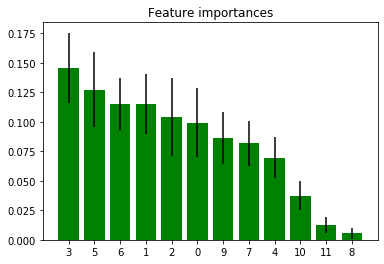

In [483]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importancesRF[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

As shown in the picture instrumentals, loudness, speechiness  are the 3 more important features in order to predict if a song will be like or not by customer base on the features that Spotify provide in their API

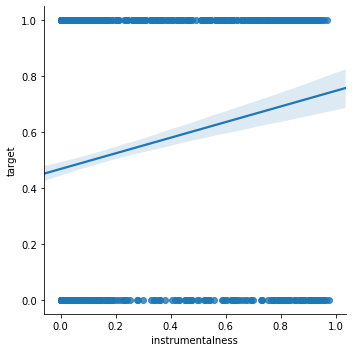

In [484]:
sns.lmplot('instrumentalness', 'target', data=spotifydataFrame, palette='summer')

In [485]:
spotifydataFrame.instrumentalness.describe()

count    2017.000000
mean        0.133286
std         0.273162
min         0.000000
25%         0.000000
50%         0.000076
75%         0.054000
max         0.976000
Name: instrumentalness, dtype: float64

Ad instrumentalness is the most important feature, is plot agaings target to show that there is a linear relationship between both variables.

In [516]:
credit['LIMIT_BAL_Discretized']=pd.cut(credit['LIMIT_BAL'], 4)

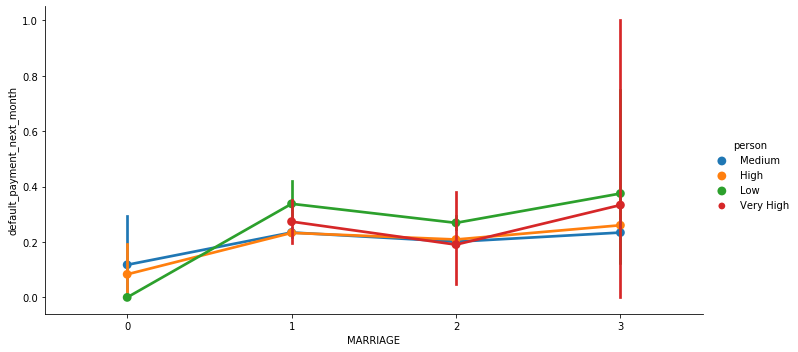

In [521]:
# Survived vs. class Grouped by gender
credit = credit.rename(columns={'default payment next month': 'default_payment_next_month'})
credit = credit.rename(columns={'default payment next month': 'MARRIAGE'})
sns.factorplot('MARRIAGE','default_payment_next_month',hue='person', data=credit,aspect=2)#, order=range(1,4))#, 
               #hue_order = ['child','female','male'])

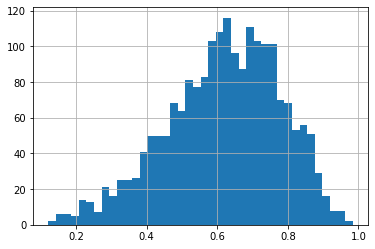

In [487]:
spotifydataFrame['danceability'].hist(bins=40)

Text(0.5, 1.0, 'Distribution of loudness')

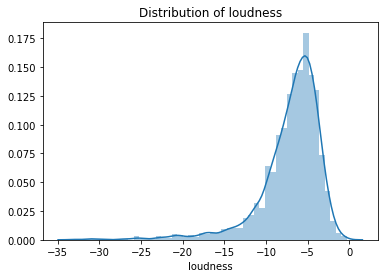

In [486]:
instrumentalnessDis = spotifydataFrame['loudness'].dropna()
# Distribution of age, with an overlay of a density plot
ins_dist = sns.distplot(instrumentalnessDis)
ins_dist.set_title("Distribution of loudness")

In [528]:
spotifydataFrame['danceability']=spotifydataFrameBackup['danceability']
spotifydataFrame['speechiness']=spotifydataFrameBackup['speechiness']

In [531]:
# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d: %s (%f)" % (f + 1, indices[f], 
    spotifydataFrameFeaturesDF.columns[indices[f]], importancesRF[indices[f]]))

Feature ranking:
1. feature 3: instrumentalness (0.145981)
2. feature 5: loudness (0.127193)
3. feature 6: speechiness (0.115122)
4. feature 1: danceability (0.115109)
5. feature 2: energy (0.104138)
6. feature 0: acousticness (0.099180)
7. feature 9: valence (0.086065)
8. feature 7: tempo (0.081972)
9. feature 4: liveness (0.069451)
10. feature 10: key (0.037556)
11. feature 11: mode (0.012755)
12. feature 8: time_signature (0.005478)
